In [12]:
import pickle
import numpy as np
import pandas as pd
import json
import os

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K
import seaborn as sns


import matplotlib.pyplot as plt

In [27]:
try:
  from google.colab import drive
  import os

  drive.mount('/content/drive/')
  os.chdir('/content/drive/MyDrive/AGH/MIO')
except:
  pass

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Load input data

# New Section

In [14]:
with open("data/X_train.pkl", "rb") as X_train_file, open(
    "data/X_test.pkl", "rb"
) as X_test_file, open("data/Y_train.pkl", "rb") as Y_train_file, open(
    "data/Y_test.pkl", "rb"
) as Y_test_file, open(
    "data/vocabulary.json", "rt"
) as vocabulary_file:
    X_test = pickle.load(X_test_file)
    X_train = pickle.load(X_train_file)
    Y_train = pickle.load(Y_train_file)
    Y_test = pickle.load(Y_test_file)
    vocabulary = json.load(vocabulary_file)

In [15]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (32897, 5000)
X_test shape: (8225, 5000)
Y_train shape: (32897, 3)
Y_test shape: (8225, 3)


In [16]:
MAX_WORDS = X_train.shape[1]
NUM_OF_CLASSES = Y_train.shape[1]
EPOCH = 10

In [17]:
model = Sequential()
model.add(Dense(512, input_shape=(MAX_WORDS,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_CLASSES))
model.add(Activation("softmax"))

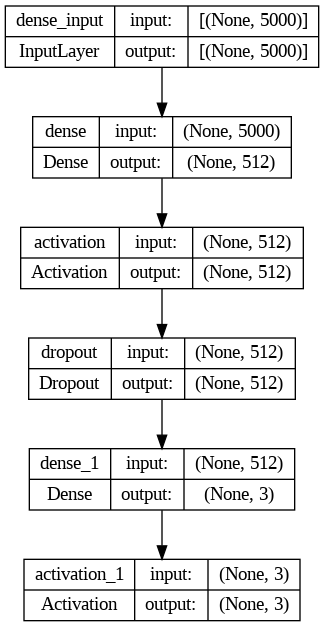

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", Precision(), Recall()])


In [20]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=EPOCH,
    verbose=1,
)

Epoch 1/10
515/515 [==============================] - 7s 3ms/step - loss: 0.4880 - accuracy: 0.8096 - precision: 0.8734 - recall: 0.7440
Epoch 2/10
515/515 [==============================] - 2s 3ms/step - loss: 0.2185 - accuracy: 0.9303 - precision: 0.9394 - recall: 0.9215
Epoch 3/10
515/515 [==============================] - 2s 3ms/step - loss: 0.1381 - accuracy: 0.9596 - precision: 0.9645 - recall: 0.9553
Epoch 4/10
515/515 [==============================] - 2s 3ms/step - loss: 0.0885 - accuracy: 0.9758 - precision: 0.9789 - recall: 0.9729
Epoch 5/10
515/515 [==============================] - 2s 4ms/step - loss: 0.0595 - accuracy: 0.9846 - precision: 0.9861 - recall: 0.9828
Epoch 6/10
515/515 [==============================] - 2s 3ms/step - loss: 0.0395 - accuracy: 0.9912 - precision: 0.9922 - recall: 0.9902
Epoch 7/10
515/515 [==============================] - 2s 3ms/step - loss: 0.0279 - accuracy: 0.9935 - precision: 0.9943 - recall: 0.9930
Epoch 8/10
515/515 [=====================

In [21]:
loss, accuracy, precision, recall = model.evaluate(X_test, Y_test, verbose=0)


def f1_score(precision, recall):
    """Function to calculate f1 score"""

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

print("Accuracy  : {:.4f}".format(accuracy))
print("Precision : {:.4f}".format(precision))
print("Recall    : {:.4f}".format(recall))
print("F1 Score  : {:.4f}".format(f1_score(precision, recall)))

Accuracy  : 0.9143
Precision : 0.9162
Recall    : 0.9133
F1 Score  : 0.9148


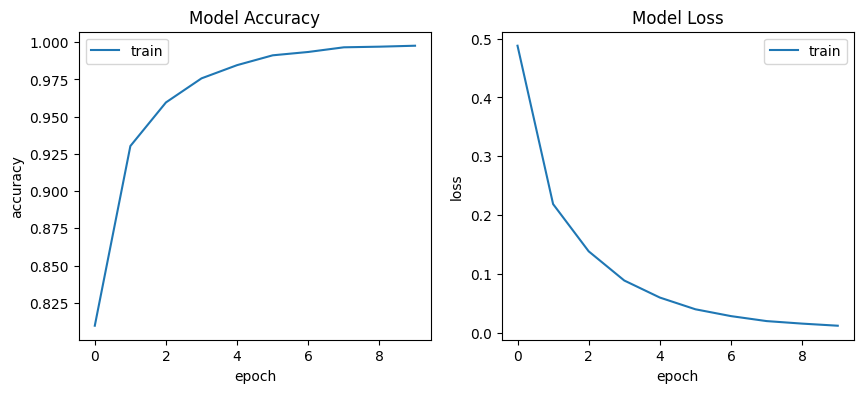

In [22]:
def plot_training_hist(history):
    """Function to plot history for accuracy and loss"""

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    # first plot
    ax[0].plot(history.history["accuracy"])
    ax[0].set_title("Model Accuracy")
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel("accuracy")
    ax[0].legend(["train", "validation"], loc="best")

    # second plot
    ax[1].plot(history.history["loss"])
    ax[1].set_title("Model Loss")
    ax[1].set_xlabel("epoch")
    ax[1].set_ylabel("loss")
    ax[1].legend(["train", "validation"], loc="best")


plot_training_hist(history)

258/258 [==============================] - 0s 2ms/step
2    4170
1    2550
0    1505
dtype: int64
2    4218
1    2553
0    1454
dtype: int64


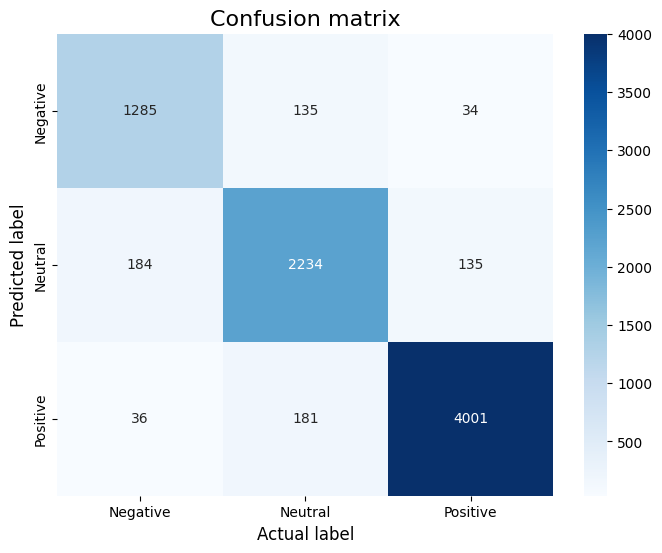

In [23]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X_test, y_test):
    """Function to plot confusion matrix for the passed model and the data"""

    sentiment_classes = ["Negative", "Neutral", "Positive"]
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(
        np.argmax(y_pred, axis=1), np.argmax(np.array(y_test), axis=1)
    )

    print(pd.Series(np.argmax(np.array(y_test), axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())

    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        cmap=plt.cm.Blues,
        annot=True,
        fmt="d",
        xticklabels=sentiment_classes,
        yticklabels=sentiment_classes,
    )
    plt.title("Confusion matrix", fontsize=16)
    plt.xlabel("Actual label", fontsize=12)
    plt.ylabel("Predicted label", fontsize=12)


plot_confusion_matrix(model, X_test, Y_test)

In [26]:
with open("models/trump_tweets_model_v2.pkl", "wb") as model_file:
    pickle.dump(model, model_file)